# Section 0: Transformations
In machine learning, data transformation is a crucial preprocessing step that helps to improve the performance and accuracy of models. Transformations are needed because raw data often does not meet the assumptions required by many machine learning algorithms.

let's first import our data set.

In [1]:
import pandas as pd

file_path = "../data/wine_Quality_Data.csv"
data = pd.read_csv(file_path)

In [4]:
data.drop(['color'], axis=1).skew()

fixed_acidity           1.723290
volatile_acidity        1.495097
citric_acid             0.471731
residual_sugar          1.435404
chlorides               5.399828
free_sulfur_dioxide     1.220066
total_sulfur_dioxide   -0.001177
density                 0.503602
pH                      0.386839
sulphates               1.797270
alcohol                 0.565718
quality                 0.189623
dtype: float64

In [46]:
data[skewed_columns].skew().sort_values(ascending=False)

chlorides              5.399828
sulphates              1.797270
fixed_acidity          1.723290
volatile_acidity       1.495097
residual_sugar         1.435404
free_sulfur_dioxide    1.220066
dtype: float64

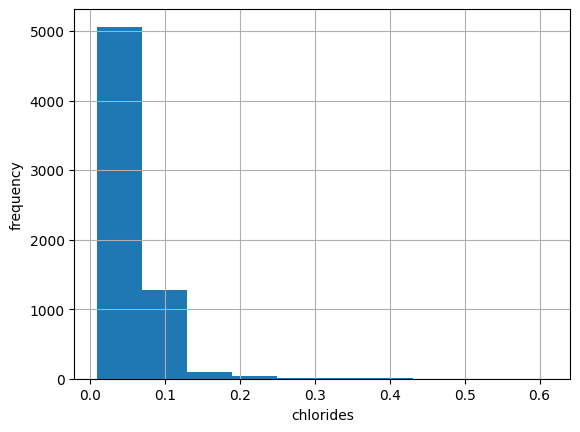

skew:  5.3998277319699035


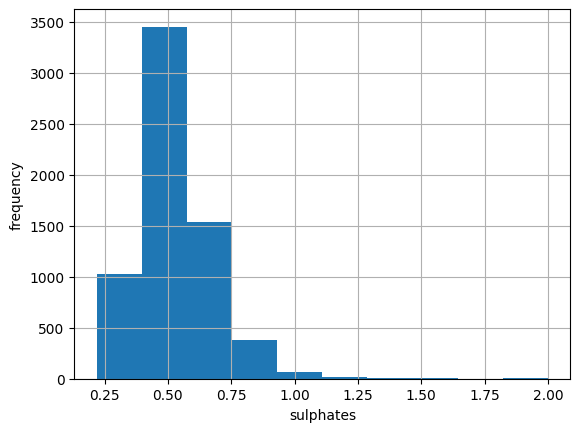

skew:  1.7972700037785152


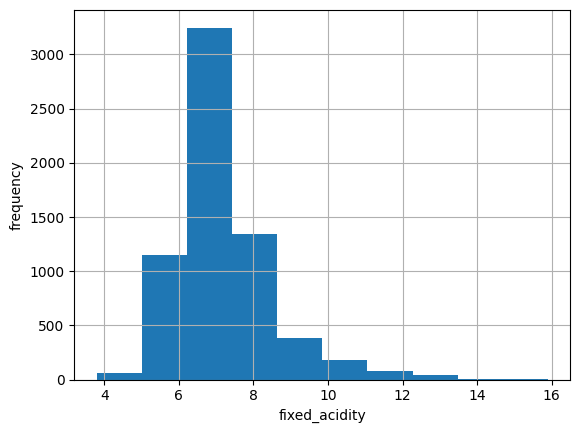

skew:  1.7232896467669239


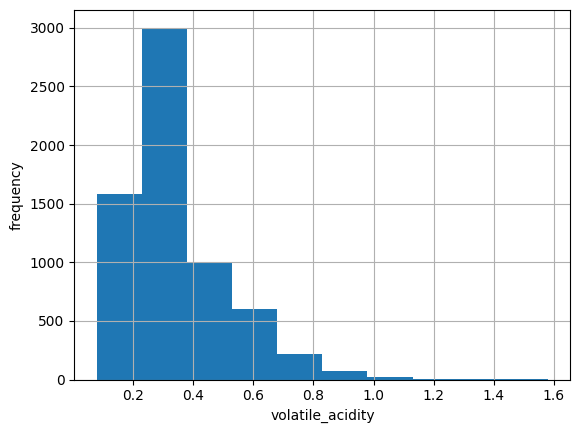

skew:  1.4950965423685545


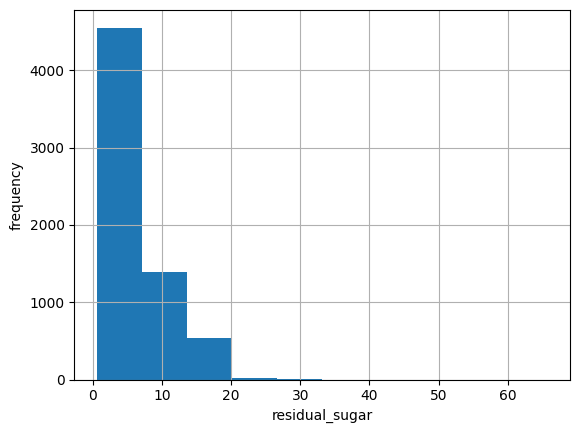

skew:  1.4354042627889907


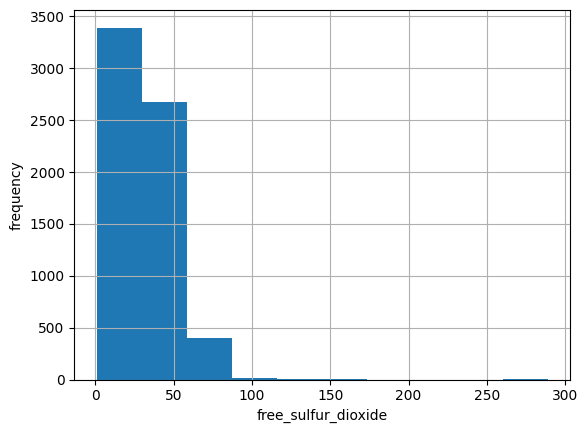

skew:  1.2200660740665203


In [62]:
import matplotlib.pyplot as plt

skew_threshold = 0.75
skewed_columns = data.drop(['color'], axis=1) \
                .abs() \
                .skew() \
                .sort_values(ascending=False) \
                .loc[lambda x: x > skew_threshold] \
                .index.tolist()

skewed_datas = data[skewed_columns].skew().to_frame().rename({0: "Normal Skew"}, axis=1)

for column in skewed_columns: 
    data[column].hist()
    plt.xlabel(column)
    plt.ylabel('frequency')
    plt.show()
    print("skew: ", data[column].skew())

with the 0.75 threshold we find the skewed datas and test some transformations on them.

our first transformation is called `Log Transformation`, and it's basically is getting a natural logarithm of the data.

but we use natural logarithm plus one so that the data that is zero don't make problem for us.

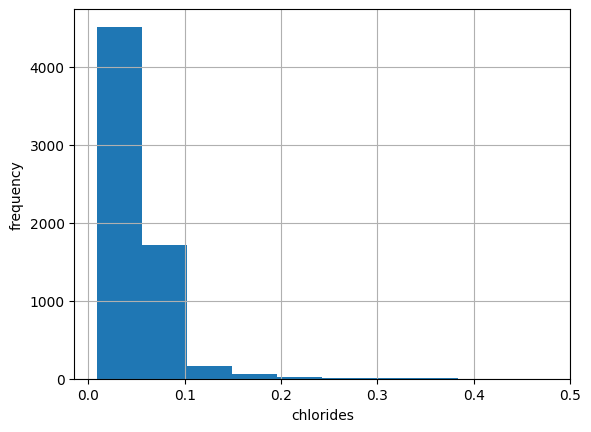

skew:  4.484421419780149


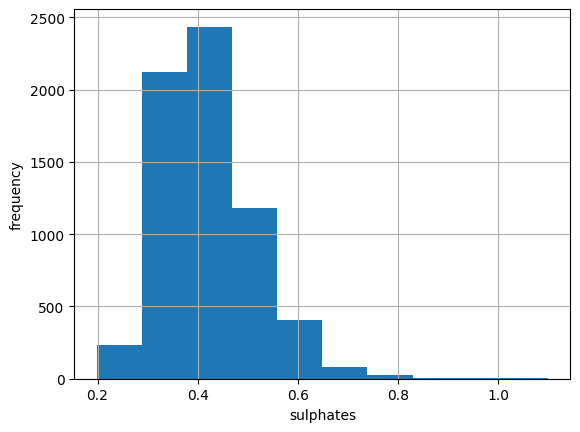

skew:  1.0985875088253145


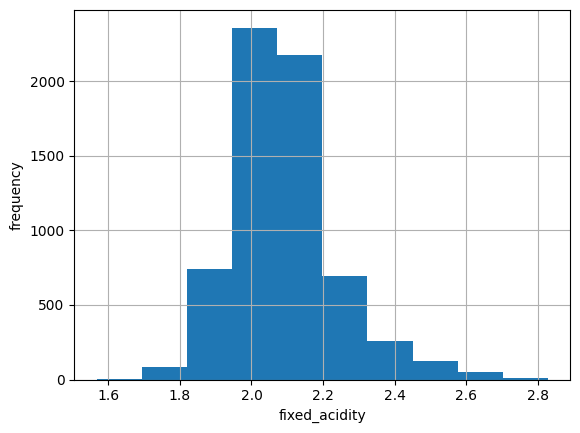

skew:  0.9767023453155699


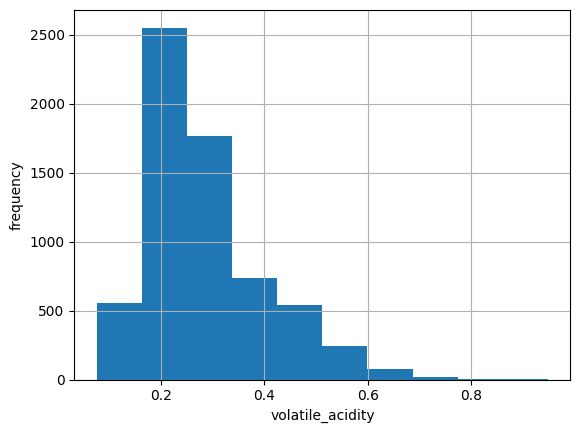

skew:  1.1268731264082754


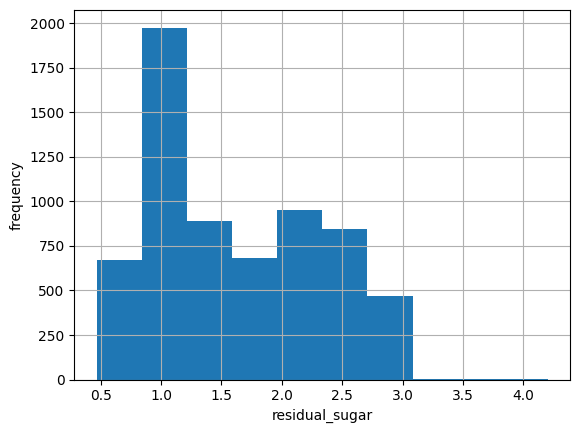

skew:  0.4149174474890768


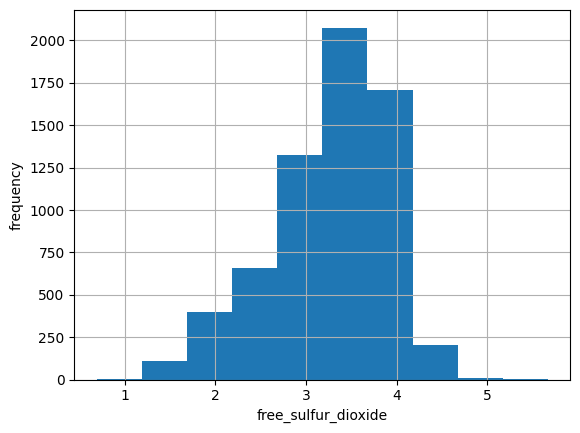

skew:  -0.7214337191021101


In [67]:
import numpy as np

log1p_skew_number = []

for column in skewed_columns: 
    transformed_data = data[column].apply(np.log1p)
    transformed_data.hist()
    plt.xlabel(column)
    plt.ylabel('frequency')
    plt.show()
    print("skew: ", transformed_data.skew())
    
    log1p_skew_number.append(transformed_data.skew())

skewed_datas["log1p"] = log1p_skew_number

In [68]:
skewed_datas

,Normal Skew,log1p
chlorides,5.399828,4.484421
sulphates,1.797270,1.098588
fixed_acidity,1.723290,0.976702
volatile_acidity,1.495097,1.126873
residual_sugar,1.435404,0.414917
free_sulfur_dioxide,1.220066,-0.721434


as we see the log1p has don his job but not that much.

now let's test `Reciprocal Transformation`, that is just use the above forumla (x is our input):
$$y = 1/x$$

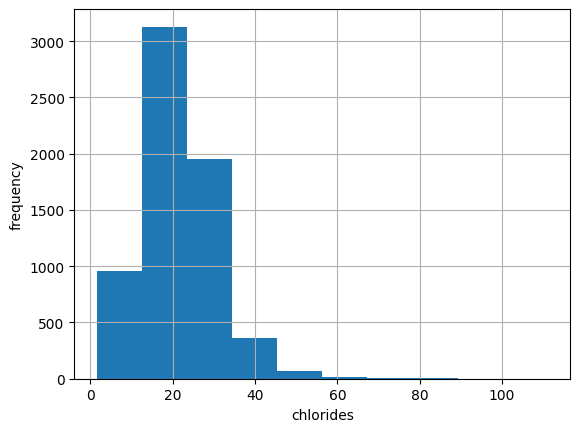

skew:  1.141903832096415


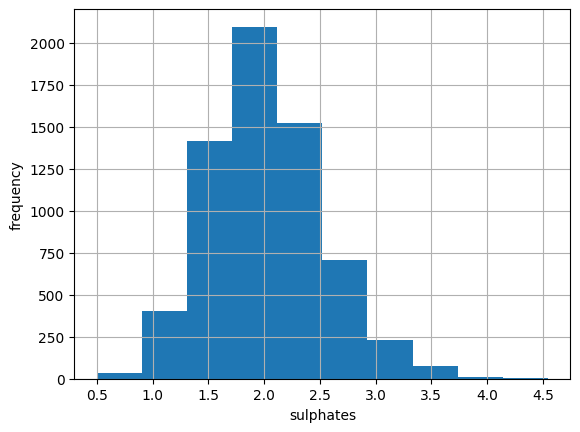

skew:  0.44214604046751327


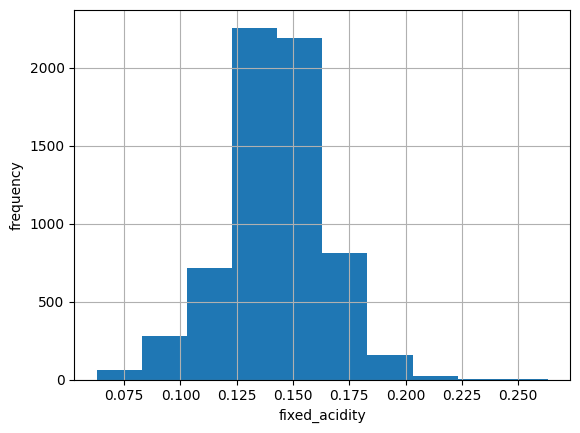

skew:  -0.15834398820312903


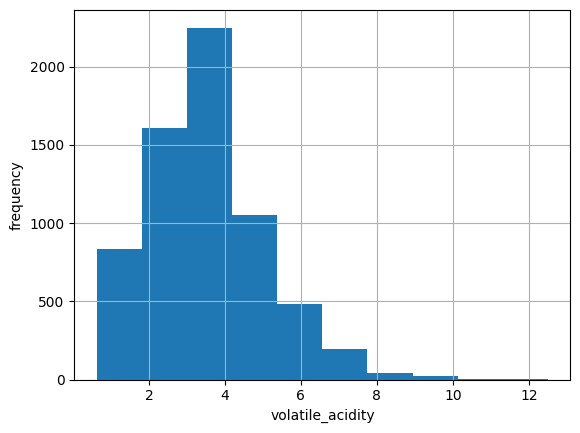

skew:  0.8933805595659433


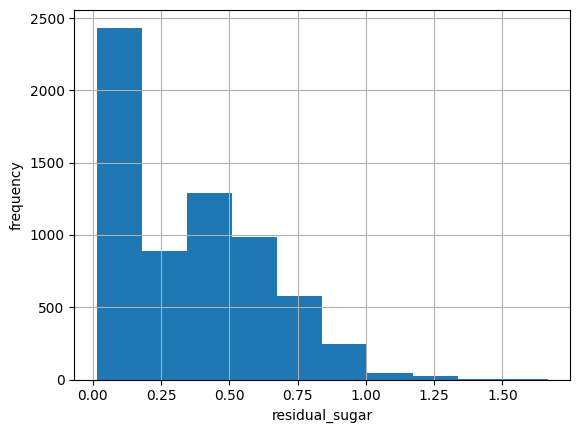

skew:  0.767211999450638


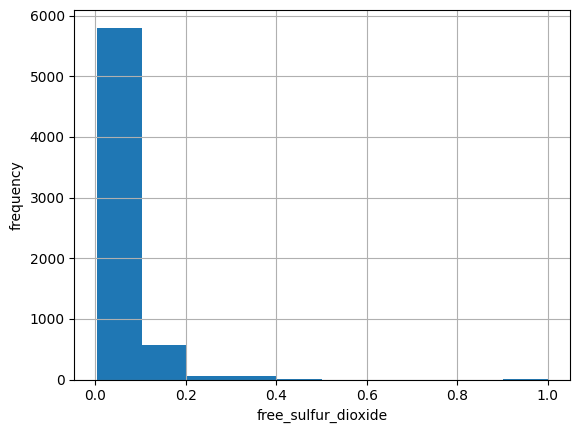

skew:  4.590587878980111


In [78]:
reciprocal_skew_number = []

for column in skewed_columns: 
    transformed_data = data[column].apply(np.reciprocal)
    transformed_data.hist()
    plt.xlabel(column)
    plt.ylabel('frequency')
    plt.show()
    print("skew: ", transformed_data.skew())
    
    reciprocal_skew_number.append(transformed_data.skew())

skewed_datas["reciprocal"] = reciprocal_skew_number

In [79]:
skewed_datas

,Normal Skew,log1p,reciprocal
chlorides,5.399828,4.484421,1.141904
sulphates,1.797270,1.098588,0.442146
fixed_acidity,1.723290,0.976702,-0.158344
volatile_acidity,1.495097,1.126873,0.893381
residual_sugar,1.435404,0.414917,0.767212
free_sulfur_dioxide,1.220066,-0.721434,4.590588


as we see from the above datas, those with a large amount of skew had a much better output than the others.

Now lets test `Square Transformation`:
$$y=(x²)$$

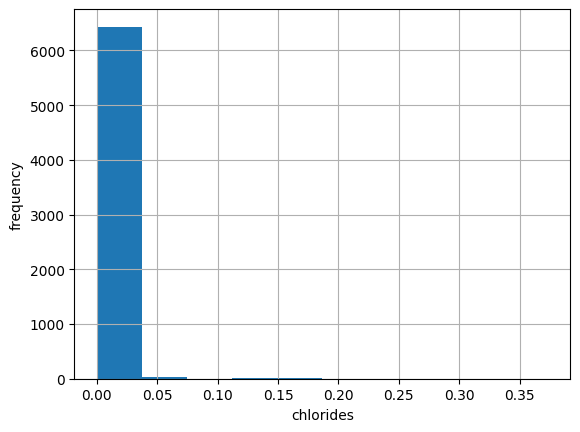

skew:  15.988300718747793


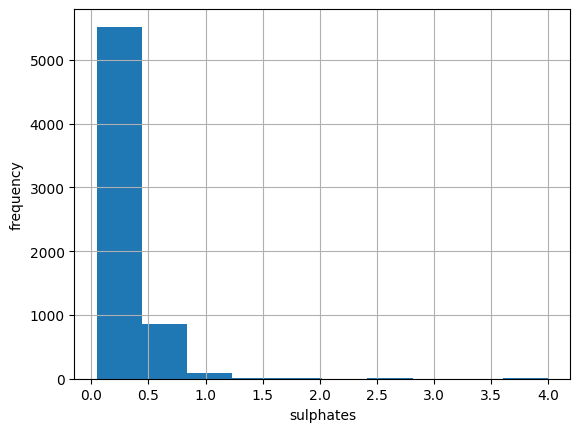

skew:  5.533418973430587


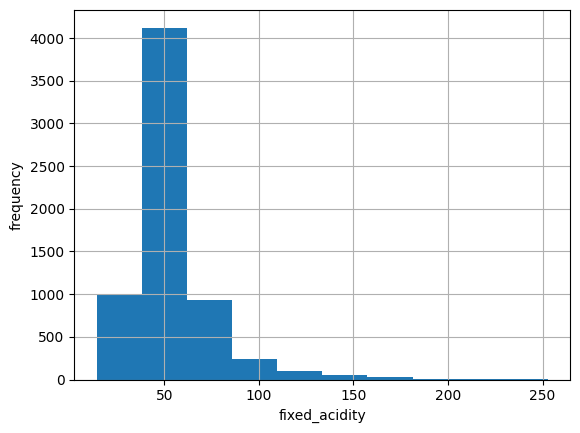

skew:  2.7709181887645276


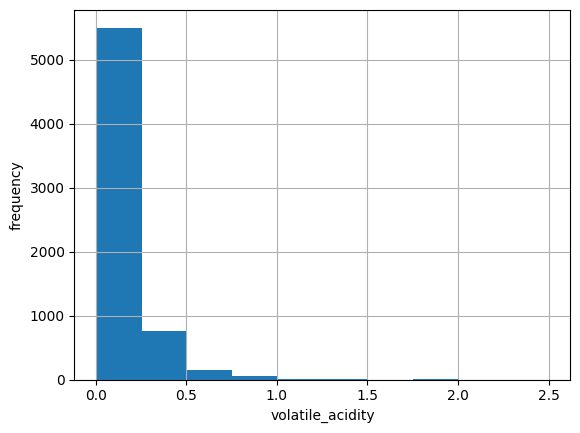

skew:  3.2946728062362953


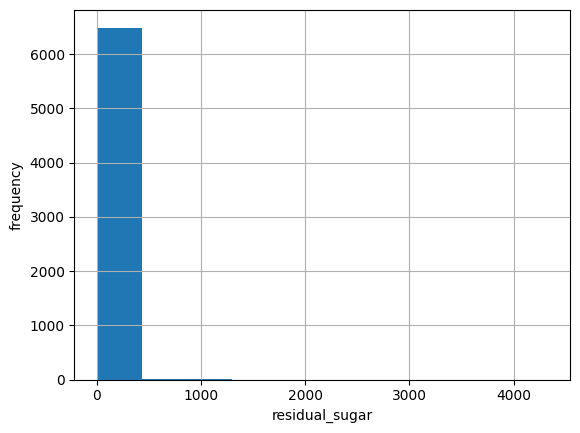

skew:  14.8795152956025


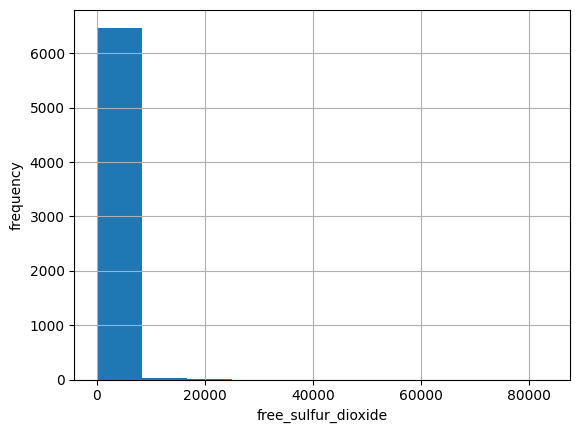

skew:  18.38189636391981


In [82]:
square_skew_number = []

for column in skewed_columns: 
    transformed_data = data[column].apply(np.square)
    transformed_data.hist()
    plt.xlabel(column)
    plt.ylabel('frequency')
    plt.show()
    print("skew: ", transformed_data.skew())
    
    square_skew_number.append(transformed_data.skew())

skewed_datas["square"] = square_skew_number

In [83]:
skewed_datas

,Normal Skew,log1p,reciprocal,square
chlorides,5.399828,4.484421,1.141904,15.988301
sulphates,1.797270,1.098588,0.442146,5.533419
fixed_acidity,1.723290,0.976702,-0.158344,2.770918
volatile_acidity,1.495097,1.126873,0.893381,3.294673
residual_sugar,1.435404,0.414917,0.767212,14.879515
free_sulfur_dioxide,1.220066,-0.721434,4.590588,18.381896


OMG that was horrible, maybe we must use this technique somewhere else.

now let's use some real shit, we call it `Box-Cox Transformer`.

The Box-Cox transformation is a statistical technique used in machine learning to stabilize the variance and make the data more closely approximate a normal distribution.

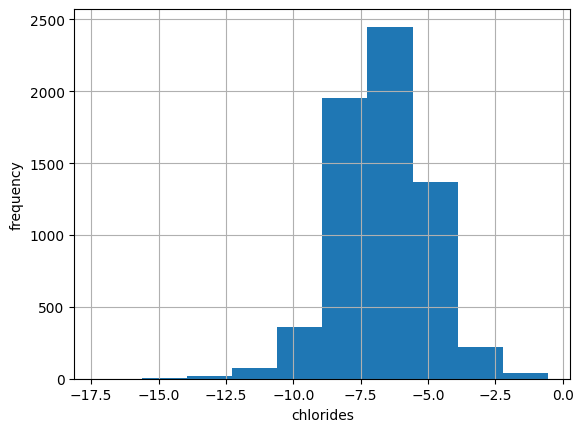

skew:  -0.057920080115971856


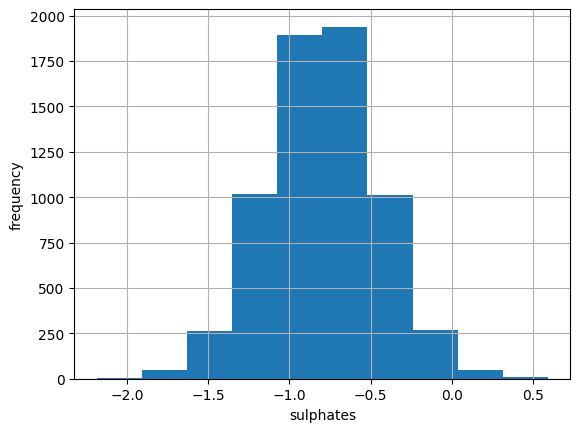

skew:  -0.007527799599843567


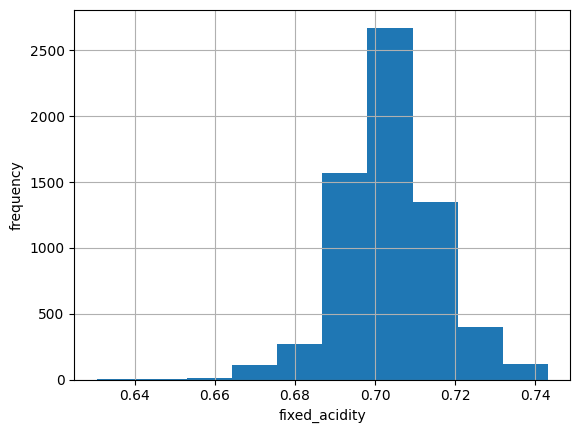

skew:  -0.06283766231718399


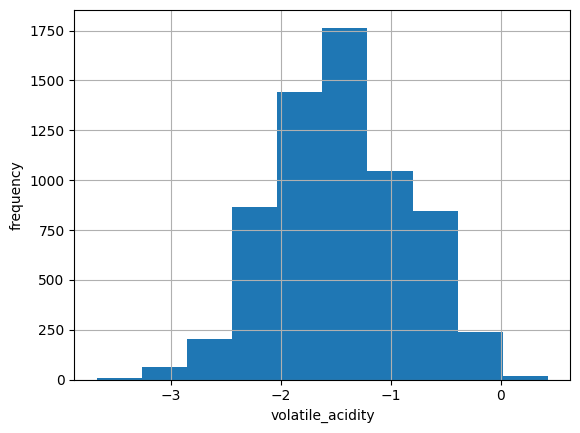

skew:  0.01077783080725396


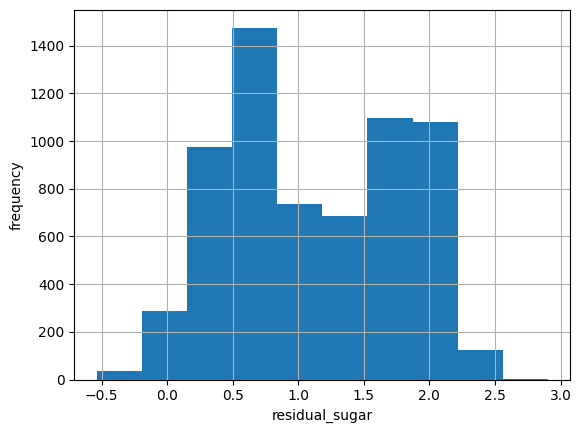

skew:  0.06967844741254008


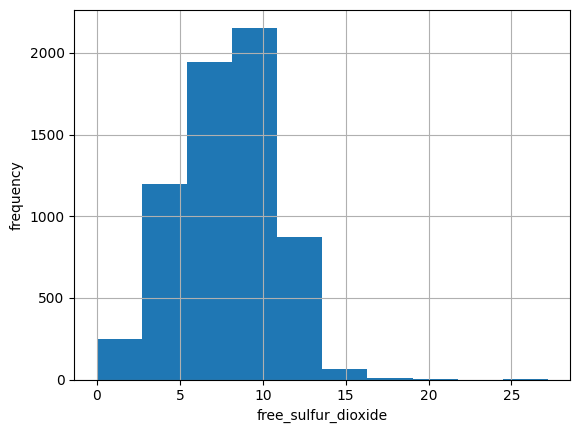

skew:  -0.040868266887018154


In [95]:
from scipy.stats import boxcox

boxcox_skew_number = []

for column in skewed_columns: 
    transformed_data = pd.Series(boxcox(data[column])[0])
    transformed_data.hist()
    plt.xlabel(column)
    plt.ylabel('frequency')
    plt.show()
    print("skew: ", transformed_data.skew())
    
    boxcox_skew_number.append(transformed_data.skew())

skewed_datas["boxcox"] = boxcox_skew_number

In [96]:
skewed_datas

,Normal Skew,log1p,reciprocal,square,boxcox
chlorides,5.399828,4.484421,1.141904,15.988301,-0.057920
sulphates,1.797270,1.098588,0.442146,5.533419,-0.007528
fixed_acidity,1.723290,0.976702,-0.158344,2.770918,-0.062838
volatile_acidity,1.495097,1.126873,0.893381,3.294673,0.010778
residual_sugar,1.435404,0.414917,0.767212,14.879515,0.069678
free_sulfur_dioxide,1.220066,-0.721434,4.590588,18.381896,-0.040868


as we can see how good boxcox transforms our data that there is no anymore skewed datas.

but for making sure there isn't any better transformation techniques, lets test `Yeo-Johnson Transformer`.

The Yeo-Johnson transformation is an extension of the Box-Cox transformation, designed to handle both positive and negative values in the dataset. Similar to Box-Cox, the Yeo-Johnson transformation aims to stabilize variance, make the data more symmetric, and bring it closer to a normal distribution.